In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

## Loading the dataset

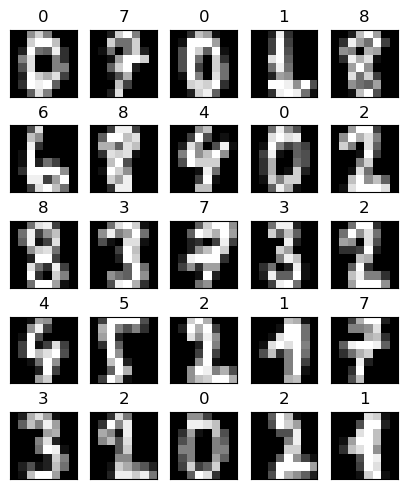

In [2]:
digits = load_digits()
fig, axs = plt.subplots(5, 5, figsize=(5,6))
idxs = np.random.choice(digits.data.shape[0], 25)

for i, idx in enumerate(idxs):
    ax = axs[i//5,i%5]
    ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
    ax.imshow(digits.images[idx], cmap="gray")
    ax.set_title(digits.target[idx])
    
plt.show()

## Applying PCA

In [3]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [4]:
pca = PCA(n_components = 30)

In [5]:
X_train_low_dimensional = pca.fit_transform(X_train)
X_test_low_dimensional = pca.transform(X_test)

In [6]:
print(f"Amount of variance captured: {round(sum(pca.explained_variance_ratio_*100))}%")

Amount of variance captured: 96%


## Applying K-NN using Grid Search to select the hyperparameter k

In [7]:
parameters = {'n_neighbors':tuple(range(1, 11))}
knn = KNeighborsClassifier()
knn = GridSearchCV(knn, parameters).fit(X_train_low_dimensional, y_train)

In [8]:
y_pred = knn.predict(X_test_low_dimensional)

In [9]:
accuracy = accuracy_score(y_pred, y_test)

In [10]:
accuracy

0.9916666666666667